# Import Liberary

In [129]:
import urllib
from bs4 import BeautifulSoup as bs
from time import sleep
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,wordnet
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [130]:
url_list=['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']    

### Data Scraping

In [131]:
artiest=[]
trans_list=[]
for i in url_list:
    webpage=urllib.request.urlopen(i)
    soup=bs(webpage,"html.parser")
    artiest.append([i.text[:i.text.find(":")].lower() for i in soup.select("h1.elementor-heading-title")])
    trans_list.append([i.text.lower() for i in soup.select("div.elementor-element:nth-child(6) > div:nth-child(1)")])

In [132]:
len(trans_list)

10

In [133]:
trans_list=[" ".join(i)for i in trans_list]

In [134]:
# raw transcript of the comedians stand up
trans_list

['\nintro\nfade the music out. let’s roll. hold there. lights. do the lights. thank you. thank you very much. i appreciate that. i don’t necessarily agree with you, but i appreciate very much. well, this is a nice place. this is easily the nicest place for many miles in every direction. that’s how you compliment a building and shit on a town with one sentence. it is odd around here, as i was driving here. there doesn’t seem to be any difference between the sidewalk and the street for pedestrians here. people just kind of walk in the middle of the road. i love traveling and seeing all the different parts of the country. i live in new york. i live in a– there’s no value to your doing that at all.\n“the old lady and the dog”\ni live– i live in new york. i always– like, there’s this old lady in my neighborhood, and she’s always walking her dog. she’s always just– she’s very old. she just stands there just being old, and the dog just fights gravity every day, just– the two of them, it’s rea

In [135]:
[len(i)for i in trans_list]

[39147, 4, 4, 47, 58687, 4, 38978, 34522, 4, 4]

In [136]:
artiest= [" ".join(i)for i in artiest]

In [137]:
# Artists Names
artiest

['louis c.k.',
 'dave chappelle',
 'ricky gervais',
 'bill burr',
 'jim jefferies',
 'john mulaney',
 'ali wong',
 'anthony jeselnik',
 'mike birbiglia',
 'joe rogan']

In [138]:
import string

In [139]:
# Cleaning Up the Data
def clean_data(text):
    return [[WordNetLemmatizer().lemmatize(i) for i in word_tokenize(a) if len(i)>2 if i!="\n" if i!='"'if i not in string.punctuation if i not in stopwords.words("english")]for a in text ]

In [140]:
clean_text=clean_data(trans_list)

In [141]:
clean_text=[" ".join(i)for i in clean_text]

In [142]:
clean_text

['intro fade music let roll hold light light thank thank much appreciate necessarily agree appreciate much well nice place easily nicest place many mile every direction compliment building shit town one sentence odd around driving seem difference sidewalk street pedestrian people kind walk middle road love traveling seeing different part country live new york live value old lady dog live– live new york always– like old lady neighborhood always walking dog always just– old stand old dog fight gravity every day just– two really– dog got cloudy eye got cloudy eye stand looking street two dimension together and– always wearing like old sweater dress guess sweater like like sweater leg are– leg nightmare white green streak bone sticking leg awful saw guy leg wheeling like yecch thank want rather air like look shit. see two time always look always think god hope dy first. hope dy first sake want lose dog think able handle dies– old lady dy first worried dog dog even know old lady dog aware t

In [143]:
df=pd.DataFrame(clean_text,index=artiest)

In [144]:
df.head()

,0
louis c.k.,intro fade music let roll hold light light tha...
dave chappelle,
ricky gervais,
bill burr,bill burr stand-up transcript
jim jefferies,car horn honk audience cheering announcer lady...


In [145]:
# dropping the empty rows
df.drop(df.loc[df[0]==''].index,inplace=True)

In [146]:
df

,0
louis c.k.,intro fade music let roll hold light light tha...
bill burr,bill burr stand-up transcript
jim jefferies,car horn honk audience cheering announcer lady...
ali wong,lady gentleman please welcome stage ali wong h...
anthony jeselnik,thank thank thank san francisco thank much goo...


# Phrase Modulation
## Bigrams

In [147]:
import gensim
from nltk.probability import FreqDist

In [148]:
phrase_model_train=gensim.models.phrases.Phrases(sentences=[a.split() for a in df[0]],threshold=2,min_count=1)

In [152]:
bi=phrase_model_train[[a.split() for a in df[0]]]
[i for i in bi]

[['intro',
  'fade',
  'music',
  'let',
  'roll',
  'hold',
  'light',
  'light',
  'thank_thank',
  'much',
  'appreciate',
  'necessarily',
  'agree',
  'appreciate',
  'much',
  'well',
  'nice_place',
  'easily',
  'nicest',
  'place',
  'many',
  'mile_every',
  'direction',
  'compliment',
  'building',
  'shit',
  'town',
  'one',
  'sentence',
  'odd',
  'around',
  'driving',
  'seem',
  'difference',
  'sidewalk',
  'street',
  'pedestrian',
  'people_kind',
  'walk',
  'middle',
  'road',
  'love',
  'traveling',
  'seeing',
  'different',
  'part',
  'country',
  'live_new',
  'york',
  'live',
  'value',
  'old_lady',
  'dog',
  'live–',
  'live_new',
  'york',
  'always–',
  'like',
  'old_lady',
  'neighborhood',
  'always',
  'walking',
  'dog',
  'always',
  'just–',
  'old',
  'stand',
  'old',
  'dog',
  'fight',
  'gravity',
  'every_day',
  'just–',
  'two',
  'really–',
  'dog',
  'got_cloudy',
  'eye',
  'got_cloudy',
  'eye',
  'stand',
  'looking',
  'street',

In [155]:
len(phrase_model_train.vocab.keys())

16225

# Word Embeddings
## Count Vectorizer

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
count_model=CountVectorizer(lowercase=False,ngram_range=(1,2),stop_words="english")

In [158]:
# Document Term Matrix
matrix=count_model.fit_transform([i for i in df[0]])

In [159]:
count_model.get_feature_names_out(),len(count_model.get_feature_names_out())

(array(['00', '00 monday', '00 usually', ..., 'zero value', 'zombie',
        'zombie just'], dtype=object),
 13677)

In [160]:
# Document Term Matrix

pd.DataFrame(matrix.toarray(),columns=count_model.get_feature_names_out(),index=df.index)

,00,00 monday,00 usually,000,000 34,000 american,000 buck,000 debt,000 great,000 hot,...,zealand rise,zealand seen,zealand shark,zealand tracked,zealand want,zero,zero people,zero value,zombie,zombie just
louis c.k.,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
bill burr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim jefferies,1,1,0,7,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
ali wong,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
anthony jeselnik,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0


# Topic Modelling
## Latent Derichlet Allocation

In [161]:
lda=gensim.models.ldamodel.LdaModel

In [162]:
# preparing Dictionary
dic=gensim.corpora.Dictionary(i.split() for i in df[0])

In [163]:
# preparing bag of words
corpus=[dic.doc2bow(i.split())for i in df[0]]

In [164]:
# innitializing Model
lda_model_train=lda(corpus,num_topics=5,id2word=dic)

In [165]:
lda_model_train.show_topics()

[(0,
  '0.020*"like" + 0.013*"get" + 0.011*"know" + 0.008*"right" + 0.008*"got" + 0.007*"one" + 0.006*"would" + 0.006*"thing" + 0.006*"day" + 0.006*"gon"'),
 (1,
  '0.012*"like" + 0.009*"know" + 0.009*"got" + 0.009*"get" + 0.006*"one" + 0.005*"people" + 0.005*"see" + 0.005*"gon" + 0.005*"thing" + 0.005*"right"'),
 (2,
  '0.029*"like" + 0.014*"know" + 0.013*"get" + 0.008*"got" + 0.008*"people" + 0.008*"thing" + 0.007*"right" + 0.007*"one" + 0.006*"time" + 0.006*"woman"'),
 (3,
  '0.014*"like" + 0.011*"know" + 0.011*"right" + 0.009*"get" + 0.007*"fucking" + 0.007*"people" + 0.007*"one" + 0.007*"thing" + 0.006*"shit" + 0.006*"guy"'),
 (4,
  '0.019*"like" + 0.016*"know" + 0.008*"right" + 0.008*"get" + 0.007*"got" + 0.007*"thing" + 0.007*"people" + 0.006*"fucking" + 0.006*"one" + 0.006*"think"')]

In [166]:
df[0]=df[0].apply(lambda x:x.split())

In [167]:
# extracting top 20 common words for every comedian
common_tokens=[[i[0] for i in FreqDist(df[0][z]).most_common(20)] for z in range(len(df[0]))]

In [168]:
pd.DataFrame(common_tokens)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,like,know,get,life,people,thing,tit,one,gon,cause,every,kid,guy,time,would,think,shit,good,woman,right
1,bill,burr,stand-up,transcript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,like,right,fucking,know,went,get,thing,one,people,fuck,gun,think,day,woman,going,come,go,got,said,guy
3,like,know,get,got,shit,gon,woman,lot,see,wan,husband,would,day,right,time,cause,people,need,pregnant,tell
4,like,joke,got,one,get,know,said,thing,say,guy,anthony,day,people,would,see,ever,tell,time,grandma,think


In [169]:
token_list=[i for i in df[0]]

In [170]:
# original Tokens
len(token_list[0]),token_list

(3363,
 [['intro',
   'fade',
   'music',
   'let',
   'roll',
   'hold',
   'light',
   'light',
   'thank',
   'thank',
   'much',
   'appreciate',
   'necessarily',
   'agree',
   'appreciate',
   'much',
   'well',
   'nice',
   'place',
   'easily',
   'nicest',
   'place',
   'many',
   'mile',
   'every',
   'direction',
   'compliment',
   'building',
   'shit',
   'town',
   'one',
   'sentence',
   'odd',
   'around',
   'driving',
   'seem',
   'difference',
   'sidewalk',
   'street',
   'pedestrian',
   'people',
   'kind',
   'walk',
   'middle',
   'road',
   'love',
   'traveling',
   'seeing',
   'different',
   'part',
   'country',
   'live',
   'new',
   'york',
   'live',
   'value',
   'old',
   'lady',
   'dog',
   'live–',
   'live',
   'new',
   'york',
   'always–',
   'like',
   'old',
   'lady',
   'neighborhood',
   'always',
   'walking',
   'dog',
   'always',
   'just–',
   'old',
   'stand',
   'old',
   'dog',
   'fight',
   'gravity',
   'every',
   '

In [171]:
# removing common words
df[0]=[[x for x in token_list[i]if x not in common_tokens[i]]for i in range(len(common_tokens))]

In [172]:
# originally 3363 tokens
len(df[0][0])

2650

In [173]:
# now again Topic Modelling

# new dictionay
new_dic=gensim.corpora.Dictionary([i for i in df[0]])

In [174]:
df[0]

louis c.k.          [intro, fade, music, let, roll, hold, light, l...
bill burr                                                          []
jim jefferies       [car, horn, honk, audience, cheering, announce...
ali wong            [lady, gentleman, please, welcome, stage, ali,...
anthony jeselnik    [thank, thank, thank, san, francisco, thank, m...
Name: 0, dtype: object

In [175]:
# New bag of words
new_corpus=[new_dic.doc2bow(i)for i in df[0]]

In [176]:
lda_model_train_2=lda(new_corpus,num_topics=5,id2word=new_dic)

In [177]:
# 10 topics from every transcript

lda_model_train_2.show_topics()

[(0,
  '0.005*"really" + 0.004*"yeah" + 0.004*"never" + 0.004*"come" + 0.004*"want" + 0.004*"baby" + 0.004*"could" + 0.003*"even" + 0.003*"say" + 0.003*"love"'),
 (1,
  '0.004*"want" + 0.004*"say" + 0.004*"first" + 0.004*"man" + 0.004*"see" + 0.004*"mean" + 0.003*"come" + 0.003*"make" + 0.003*"never" + 0.003*"yeah"'),
 (2,
  '0.005*"really" + 0.004*"love" + 0.004*"little" + 0.003*"want" + 0.003*"good" + 0.003*"look" + 0.003*"girl" + 0.003*"never" + 0.003*"even" + 0.003*"man"'),
 (3,
  '0.004*"say" + 0.004*"never" + 0.004*"see" + 0.004*"first" + 0.004*"really" + 0.003*"little" + 0.003*"could" + 0.003*"love" + 0.003*"take" + 0.003*"way"'),
 (4,
  '0.004*"want" + 0.003*"say" + 0.003*"really" + 0.003*"even" + 0.003*"never" + 0.003*"baby" + 0.003*"let" + 0.003*"little" + 0.003*"way" + 0.003*"love"')]


# Exploratory Data Analyses

## 1. Total number of Words spoken
## 2. Total number of Unique Words spoken
## 3. Common words by every Comedian
## 4. Simmilar common words
## 5. Profanity Used

In [178]:
df.drop(index='bill burr',inplace=True)

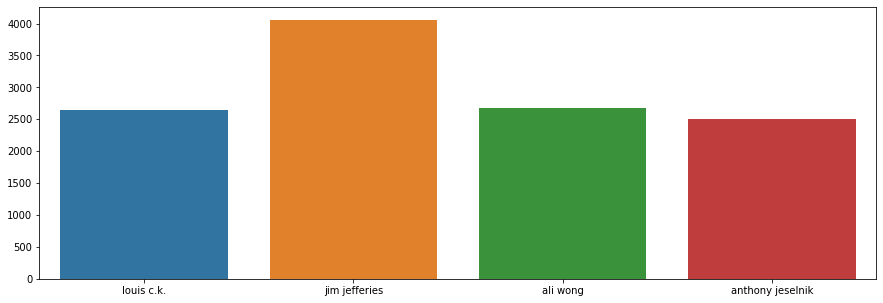

In [179]:
# Total Number Of Words per Comedian
total_count=[]
for i in df[0].values:
    count=0
    for j in i:
        count+=1
    total_count.append(count)

plt.figure(figsize=(15,5))
sns.barplot(x=df.index,y=total_count)
plt.savefig("TOT_words")

### As per the graph " Jim Jefferies" speak really fast with whooping 4000 words in a single standup night

In [180]:
# Total number of Unique Words by every Comedian

unique_words_count=[len(pd.DataFrame(df[0][i])[0].unique()) for i in range(len(df[0].values))]

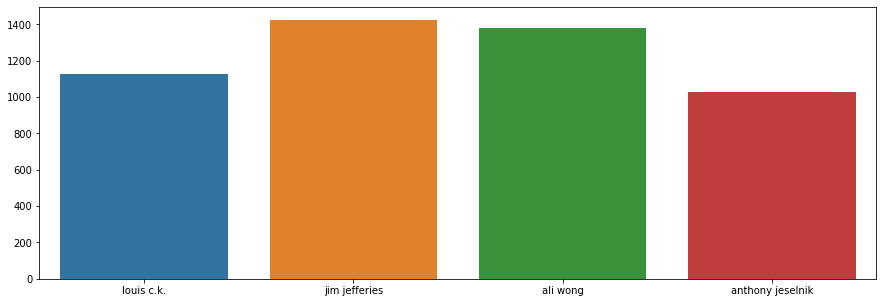

In [181]:
plt.figure(figsize=(15,5))

sns.barplot(x=df.index,y=unique_words_count)
plt.savefig("Uniqe_words")

## As the unique word count of " Jim Jefferies" is more than any one else but interestign find is that " Ali Wong " uses more unique words prior to her total words.

## Then that means Ali Wong will make use of distinguised words more than any one else if word count of every comedian was equal.

In [182]:
# Lets see the profanity used by Comedians

# lets take the most number of words spoken i.e Jim Jefferies and collect the words starts with "f" or "s"

swear_words=list(set([ i for i in df.iloc[1][0] if i.startswith(("fuck","shit"))]))

In [183]:
swear_words.extend(["fuck","shit"])

In [184]:
swear_count=[]
for i in df[0].values:
    count=0
    for j in i:
        if j in swear_words:
           count+=1
    swear_count.append(count)

swear_count

[19, 33, 16, 22]

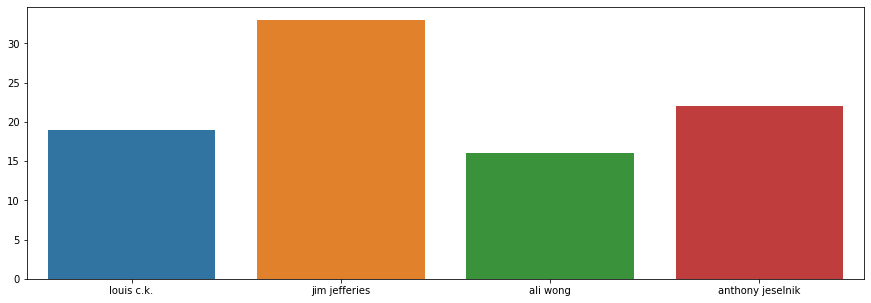

In [185]:
plt.figure(figsize=(15,5))

sns.barplot(x=df.index,y=swear_count)
plt.savefig("Swear_count")

### Lowest profanity " Ali Wong "
### Highest profanity " Jim Jefferies "

# Lets see the common words spoken by every comedian

In [186]:
unique_words=[pd.DataFrame(df[0][i])[0].unique().tolist() for i in range(len(df[0].values))]

In [187]:
unique_words

[['intro',
  'fade',
  'music',
  'let',
  'roll',
  'hold',
  'light',
  'thank',
  'much',
  'appreciate',
  'necessarily',
  'agree',
  'well',
  'nice',
  'place',
  'easily',
  'nicest',
  'many',
  'mile',
  'direction',
  'compliment',
  'building',
  'town',
  'sentence',
  'odd',
  'around',
  'driving',
  'seem',
  'difference',
  'sidewalk',
  'street',
  'pedestrian',
  'kind',
  'walk',
  'middle',
  'road',
  'love',
  'traveling',
  'seeing',
  'different',
  'part',
  'country',
  'live',
  'new',
  'york',
  'value',
  'old',
  'lady',
  'dog',
  'live–',
  'always–',
  'neighborhood',
  'always',
  'walking',
  'just–',
  'stand',
  'fight',
  'gravity',
  'day',
  'two',
  'really–',
  'got',
  'cloudy',
  'eye',
  'looking',
  'dimension',
  'together',
  'and–',
  'wearing',
  'sweater',
  'dress',
  'guess',
  'leg',
  'are–',
  'nightmare',
  'white',
  'green',
  'streak',
  'bone',
  'sticking',
  'awful',
  'saw',
  'wheeling',
  'yecch',
  'want',
  'rather',

In [188]:
# look for largest list
[len(i)for i in unique_words]

[1126, 1425, 1381, 1027]

In [189]:
# sort according to larger list
unique_words.sort(key=lambda x:len(x))
[len(i)for i in unique_words]

[1027, 1126, 1381, 1425]

In [190]:
# Make Largest list a set and intersect with all other lists
common_unique_words=set(unique_words[0])
for word in unique_words[1:]:
    common_unique_words.intersection_update(word)

In [191]:
list(common_unique_words).sort()

In [192]:
word_cloud=WordCloud(stopwords=set(STOPWORDS),width = 1000, height = 500).generate(" ".join(common_unique_words))

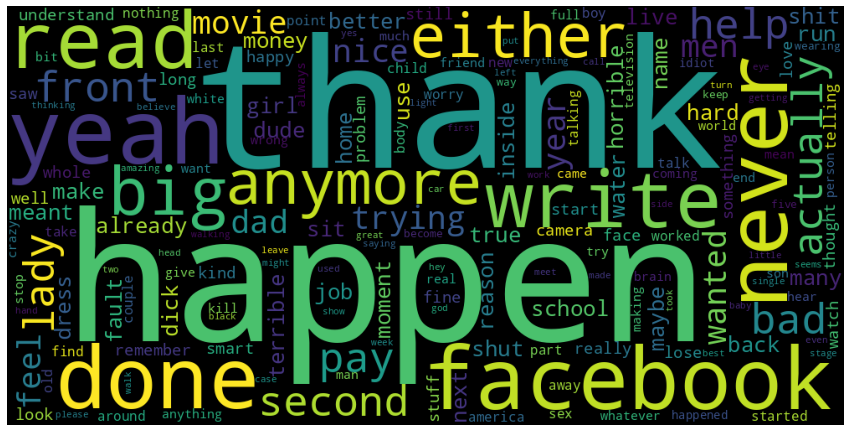

In [194]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Interesting, No profanity at all